# Function transformer is a tool in scikit-learn, a popular python library for machine learning, that allows you to apply a specified function to the input data.

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer

In [6]:
df=pd.read_csv("C:\\Users\\user\\Datasets\\covid_toy.csv")

In [7]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb=LabelEncoder()
df["gender"]=lb.fit_transform(df["gender"])
df["cough"]=lb.fit_transform(df["cough"])
df["city"]=lb.fit_transform(df["city"])
df["has_covid"]=lb.fit_transform(df["has_covid"])

In [10]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


In [11]:
trf=FunctionTransformer(func=np.log1p)

In [12]:
new_df=trf.fit_transform(df)

In [13]:
new_df.head()

,age,gender,fever,cough,city,has_covid
0,4.110874,0.693147,4.644391,0.0,1.098612,0.000000
1,3.332205,0.693147,4.615121,0.0,0.693147,0.693147
2,3.761200,0.693147,4.624973,0.0,0.693147,0.000000
3,3.465736,0.000000,4.595120,0.0,1.098612,0.000000
4,4.189655,0.000000,4.624973,0.0,1.386294,0.000000


# Power Transformer is a type of data preprocessing technique used to transform the features of a dataset to make them more gaussian like (more normally distributed).

# Box_cox=>
it is appropriate for non-negative data that doesnot contain zero values.

# Yeo-johnson=>
The yeo-johnson is a more flexible transformation that can be applied to both positive and negative data,inculding zero values.

In [14]:
from sklearn.preprocessing import PowerTransformer

In [15]:
df=pd.read_csv("C:\\Users\\user\\Datasets\\tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])
df['smoker']=lb.fit_transform(df['smoker'])
df['day']=lb.fit_transform(df['day'])
df['time']=lb.fit_transform(df['time'])

In [18]:
x=df.drop(columns=['total_bill'],axis=1)
y=df["total_bill"]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,tip,sex,smoker,day,time,size
228,2.72,1,0,1,0,2
208,2.03,1,1,1,0,2
96,4.00,1,1,0,0,2
167,4.50,1,0,2,0,4
84,2.03,1,0,3,1,2
...,...,...,...,...,...,...
106,4.06,1,1,1,0,2
14,3.02,0,0,2,0,2
92,1.00,0,1,0,0,2
179,3.55,1,1,2,0,2


In [21]:
yj=PowerTransformer(method='yeo-johnson',standardize=True)
x_train_yj=yj.fit_transform(x_train)
x_test_yj=yj.fit_transform(x_test)

In [26]:
x_train_new=pd.DataFrame(x_train_yj,columns=x_train.columns)

In [30]:
np.round(x_train_new.describe(),1)

,tip,sex,smoker,day,time,size
count,195.0,195.0,195.0,195.0,195.0,195.0
mean,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.3,-1.4,-0.8,-1.9,-0.6,-4.3
25%,-0.8,-1.4,-0.8,-0.7,-0.6,-0.6
50%,0.2,0.7,-0.8,0.3,-0.6,-0.6
75%,0.6,0.7,1.3,0.3,1.6,0.8
max,2.8,0.7,1.3,1.4,1.6,2.1


In [31]:
np.round(x_train.describe(),1)

,tip,sex,smoker,day,time,size
count,195.0,195.0,195.0,195.0,195.0,195.0
mean,3.1,0.7,0.4,1.7,0.3,2.6
std,1.4,0.5,0.5,0.9,0.4,0.9
min,1.0,0.0,0.0,0.0,0.0,1.0
25%,2.0,0.0,0.0,1.0,0.0,2.0
50%,3.0,1.0,0.0,2.0,0.0,2.0
75%,3.7,1.0,1.0,2.0,1.0,3.0
max,10.0,1.0,1.0,3.0,1.0,6.0


In [32]:
from sklearn.datasets import make_regression

In [34]:
x,y=make_regression(n_samples=4 ,n_features =1 ,n_informative=1 , n_targets=1,noise=80,random_state=13)

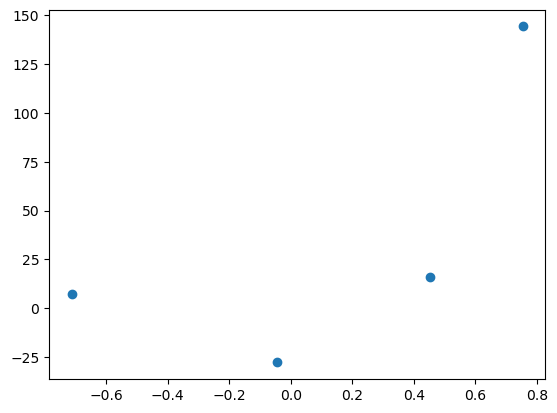

In [38]:

import matplotlib.pyplot as plt
plt.scatter(x,y)

In [39]:
from sklearn.linear_model import LinearRegression

In [42]:
# LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [43]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [44]:
reg.coef_

array([78.35063668])

In [45]:
reg.intercept_

26.15963284313262

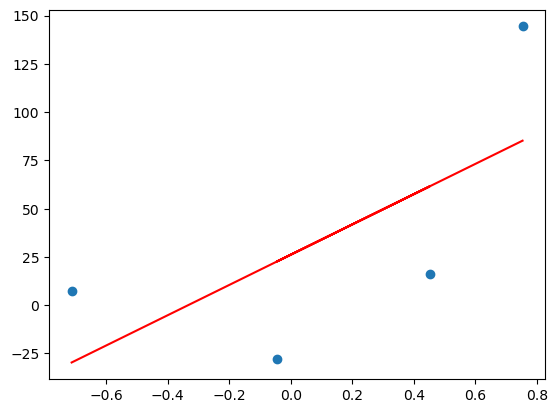

In [50]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='red')

# Bias-variance Tradeoff=>

Bias=> the difference between actual value and predicted value by the model1.

Low bias means model has learned patterns in the data while high bias means it unable to learned the patterns in the data i.e. underfitting.

Variance=> the amount of variation in the prediction if the different training data was used.

Low variance is good but high variance means that performance of the training data and validation data vary a lot.

If the bias is too low but the variance is too high then that case is known as overfitiing. So, finding a balance between these two situations is known as the bias-variance trade-off.
